# **Tabular Reinforcement Learning**

# Q-Learning on FrozenLake environment

## Non-Evaluables Practical Exercices

This is a non-evaluable practical exercise, but it is recommended that students complete it fully and individually, since it is an important part of the learning process.

The solution will be available, although it is not recommended that students consult the solution until they have completed the exercise. 

## The FrozenLake environment

In this activity, we are going to solve the [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) environment.

Main characteristics:
- The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.
- Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.
- The player makes moves until they reach the goal or fall in a hole.
- The lake is slippery (unless disabled) so the player may move perpendicular to the intended direction sometimes (see _is_slippery_ param).

<img src="https://gymnasium.farama.org/_images/frozen_lake.gif" />

## Q-Learning algorithm

<u>Question 1</u>: : **Implement the *Q-Learning* algorithm** using the following parameters:

- Number of episodes = 15,000
- *learning rate* = 0.8
- *discount factor* = 1

Additionally, implement two **$\epsilon$-Greedy with decay factor** methods with the following parameters:

**Exponential Decay Factor**:
- *max_epsilon* = 1.0
- *min_epsilon* = 0.01
- *decay_rate* = 0.005

**Linear Decay Factor**:
- *max_epsilon* = 1.0
- *min_epsilon* = 0.1
- Number of frames to reach *min_epsilon* = 1000

<u>Question 2</u>: Once you have coded the algorithm, try different **values for the hyperparameters** and comment the best ones (providing an empirical comparison):

- Number of episodes
- *learning rate* 
- *discount factor* 
- *epsilon* values (including min value and decay factor)

<u>Question 3</u>: Try to solve the same environment but using a _8 x 8_ grid (also in slippery mode):
> gym.make(ENV_NAME, desc=None, map_name="8x8", is_slippery=True)

In [6]:
import gymnasium as gym

# definig the environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

print("Gymnasium version is {} ".format(gym.__version__))
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Gymnasium version is 1.2.0 
Action space is Discrete(4) 
Observation space is Discrete(16) 


In [ ]:
from collections import defaultdict
import numpy as np

def epsilon_greedy_policy(Q, state, nA, epsilon):
    '''
    Create a policy where epsilon dictates the probability of a random action being carried out.

    :param Q: link state -> action value (dictionary)
    :param state: state in which the agent is (int)
    :param nA: number of actions (int)
    :param epsilon: possibility of random movement (float)
    :return: probability of each action (list) d
    '''
    probs = np.ones(nA) * epsilon / nA
    best_action = np.argmax(Q[state])
    probs[best_action] += 1.0 - epsilon

    return probs




def QLearning(episodes, learning_rate, discount, epsilon):
    '''
    Learn to solve the environment using the Q-Learning algorithm

    :param episodes: Number of episodes (int)
    :param learning_rate: Learning rate (float [0, 1])
    :param discount: Discount factor (float [0, 1])
    :param epsilon: chance that random movement is required (float [0, 1])
    :return: x,y number of episodes and number of steps
    :Q: action value function
    '''

    # Link actions to states

    """ 
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    y = np.zeros(episodes, dtype=np.float16)
    for episode in range(episodes):
        policy = epsilon_greedy_policy(Q, epsilon, env.action_space.n)



    return Q
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Number of episodes
    x = np.arange(episodes)
    y = np.zeros(episodes)
    
    for episode in range(episodes):
        state, _ = env.reset()
        # Select and execute an action
        probs = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
        action = np.random.choice(np.arange(len(probs)), p=probs)
        
        done = False
        step = 1
                
        while not done:
            # Execute action
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            # Select and execute action
            probs = epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon)
            next_action = np.random.choice(np.arange(len(probs)), p=probs)
           
            # Update TD
            td_target = reward + discount * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += learning_rate * td_error
                        
            if done:
                y[episode] = step
                break

            state = next_state
            action = next_action
            step += 1
                 
    return x, y, Q

<div class="alert alert-block alert-danger">
<strong>Solution</strong>
</div>

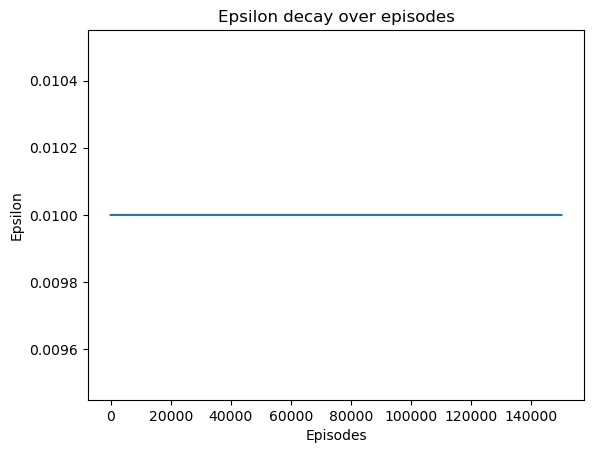

In [ ]:
EPS_START = 1.0
EPS_DECAY = 0.005
EPS_MIN = 0.01

def epsilon_decay(epsilon, decay, minimum):
    return max(epsilon * decay, minimum)

epsilon = EPS_START
values = []
for i in range(150000):
    epsilon = epsilon_decay(epsilon, EPS_DECAY, EPS_MIN)
    values.append(epsilon)

